In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file 

In [ ]:
I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#------------------------------------------------------------------------------
#                          path declare
#------------------------------------------------------------------------------

train_dir='/kaggle/input/monkeypox/Mpox/train'
val_dir='/kaggle/input/monkeypox/Mpox/val'
print("done")

done


In [3]:
import os
import numpy as np
import keras.utils as image
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from skimage import exposure
from PIL import ImageOps
import cv2
import gc
gc.collect()

#------------------------------------------------------------------------------
#                          load data and shuffle
#------------------------------------------------------------------------------


# Define the image size and number of channels
img_width, img_height, img_channels = 224, 224, 3


# Define a function to load and preprocess an image given its file path
def load_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = img / 255.0  # rescale the pixel values to [0, 1]
    return img


def classcode(x):
  #if x=='Monkeypox_augmented' :
  if x=='Monkeypox' or x=='Monkeypox_augmented':    #<------------------------------change here
    return 1
  return 0


print("loading start...")

# Load and preprocess the train images
train_images = []
train_labels = []
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        img = load_preprocess_image(file_path)
        train_images.append(img)
        train_labels.append(classcode(class_name))
train_images = np.array(train_images)
train_labels = np.array(train_labels)


# Load and preprocess the validation images
val_images = []
val_labels = []
for class_name in os.listdir(val_dir):
    class_path = os.path.join(val_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        img = load_preprocess_image(file_path)
        val_images.append(img)
        val_labels.append(classcode(class_name))
val_images = np.array(val_images)
val_labels = np.array(val_labels)

print("loading done...")

#------------------------------------------------------------------------------
#                          shuffle
#------------------------------------------------------------------------------

# Shuffle train data
idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]


# Shuffle validation data
idx = np.random.permutation(len(val_images))
val_images = val_images[idx]
val_labels = val_labels[idx]

print("shuffle done...")
print(val_labels)



loading start...
loading done...
shuffle done...
[1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0
 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 0
 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 1 0
 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 

In [3]:
# from imblearn.over_sampling import SMOTE

# # assuming train_images and train_labels are your training data
# # X should be a 2D array of flattened images and y should be a 1D array of labels
# X = train_images.reshape(train_images.shape[0], -1)
# y = train_labels
# # create a SMOTE object with desired parameters
# smote = SMOTE(sampling_strategy='minority', random_state=42)
# # apply SMOTE on the training data
# X_resampled, y_resampled = smote.fit_resample(X, y)
# # reshape the resampled data back to the original shape
# X_resampled = X_resampled.reshape(X_resampled.shape[0], train_images.shape[1], train_images.shape[2], train_images.shape[3])
# # use X_resampled and y_resampled as your new training data

# train_images=X_resampled
# train_labels=y_resampled
# gc.collect()

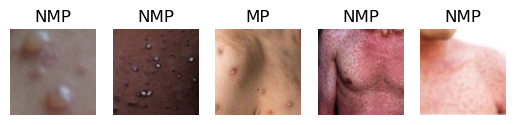

In [8]:
# -------------------------------------------
#                  loaded image
# -------------------------------------------------
import matplotlib.pyplot as plt

# assuming train_images is an array containing image data
image = train_images[22]

def conv(t):
    if t==1 : return "MP"
    else :
        return "NMP"
    

for i in range(5):
    plt.subplot(1, 5, i+1)  # Create a subplot for each image
    plt.imshow(train_images[i])  # Display the image
    plt.title(conv(train_labels[i]))
    plt.axis('off')  # Hide the axes labels

plt.show()  # Show the plot


In [2]:

#------------------------------------------------------------------------------
#                          checkpoint and earlystopping
#------------------------------------------------------------------------------

import tensorflow as tf
from keras.optimizers import Adadelta, Adagrad, Adam, Adamax, Ftrl, Nadam, RMSprop, SGD
import numpy as np
from keras.callbacks import EarlyStopping, ModelCheckpoint

# checkpoint
filepath="cnn-{epoch:02d}-{val_accuracy:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='max')

earlystopping = EarlyStopping(monitor='val_accuracy', 
                              patience=9,
                              restore_best_weights=True)

print("earlystopping and checkpoint attched on model...")


earlystopping and checkpoint attched on model...


In [ ]:
from tensorflow.keras.regularizers import l2
import gc
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.applications.vgg19 import VGG19

def load_vgg16_model():
    print("vgg16 model created...")
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    return model


def load_vgg19_model():
    print("vgg19 model created...")
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
    for layer in base_model.layers:
        layer.trainable = False

    x = Flatten()(base_model.output)
    x = Dense(256)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(32)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    
    return model

def load_vgg19_model_old():
    print("vgg19 model created...")
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)
    model.summary()
    return model


from keras.models import Sequential
from keras.layers import LSTM, Dense, Reshape, Dropout, Activation, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.models import Model
from keras import regularizers

from tensorflow.keras.layers import LayerNormalization

def create_cnn_model1(input_shape=(224,224,3), num_classes=1, reg_strength=0.01, act='relu'):
    model = Sequential()
    # feature extraction 
    num_filters = [32, 64, 128, 256, 512, 1024]
    for filters in num_filters:
        model.add(Conv2D(filters, (3,3), input_shape=input_shape, kernel_regularizer=l2(reg_strength)))
        model.add(LayerNormalization())
        model.add(Activation(act))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    # classifier
    model.add(Dense(512, kernel_regularizer=l2(reg_strength)))
    model.add(LayerNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_regularizer=l2(reg_strength)))
    model.add(LayerNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    print("cnn")
    print(f"Total trainable parameters: {model.count_params()}")
    model.summary()
    return model





#------------------------------------------------------------------------------
#                          model selection
#------------------------------------------------------------------------------



#model=load_vgg16_model()
#model=load_vgg19_model()
#model=create_lstm_model()
#model.summary()

def create_cnn_model(input_shape=(224,224,3), num_classes=1, reg_strength=0.01, act='relu'):
    print("cnn_model ;)")
    model = Sequential()
    # feature extraction 
    model.add(Conv2D(32, (3,3), input_shape=input_shape, kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    num_filters = [64, 128, 256, 512, 1024]
    for filters in num_filters:
        model.add(Conv2D(filters, (3,3), kernel_regularizer=l2(reg_strength)))
        model.add(BatchNormalization())
        model.add(Activation(act))
        model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    # classifier
    model.add(Dense(1024, kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_regularizer=l2(reg_strength)))
    model.add(BatchNormalization())
    model.add(Activation(act))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='sigmoid'))
    print("cnn model running")
    print(f"Total trainable parameters: {model.count_params()}")
    model.summary()
    return model

#model=create_cnn_model()


from keras.applications.densenet import DenseNet121
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

def build_densenet121_old_99(input_shape=(224, 224, 3)):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # Add global average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add fully connected layer with 256 neurons and ReLU activation
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    # Add output layer with 4 neurons (one for each class) and softmax activation
    #predictions = Dense(2, activation='softmax')(x)
    predictions = Dense(1, activation='sigmoid')(x)
    # Create the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model


from keras import regularizers

def build_densenet121(input_shape=(224, 224, 3)):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    # Add global average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Add fully connected layer with 256 neurons and ReLU activation
    x = Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    predictions = Dense(1, activation='sigmoid')(x)
    # Create the model
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

#3333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333333
model= create_cnn_model()

opt = Adam(  
    learning_rate=0.0001,
#    beta_1=0.09,
#    beta_2=0.5
)


model.compile(loss='binary_crossentropy', 
          optimizer=opt, 
          metrics=['accuracy'])


gc.collect()


callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=.7, patience=5, verbose=1)

# Train all layers
history=model.fit(train_images, 
          train_labels,
          batch_size=32,
          epochs=100,
          validation_data=(val_images, val_labels),
          callbacks=[callback,earlystopping,checkpoint]) #88


# ---------------------------------------------------------------------------------------------------
#                                      result
# --------------------------------------------------------------------------------------------------

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# generate predicted labels for the test data
predicted_labels = model.predict(val_images)
predicted_labels = np.round(predicted_labels)

# generate the classification report
report = classification_report(val_labels, predicted_labels)

# print the report to the console
print(report)

# Compute the confusion matrix
cm = confusion_matrix(val_labels,predicted_labels)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

# adam lr-0.0001 on contrast







cnn_model ;)
cnn model running
Total trainable parameters: 7877313
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 batch_normalization_16 (Bat  (None, 222, 222, 32)     128       
 chNormalization)                                                
                                                                 
 activation_16 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                     

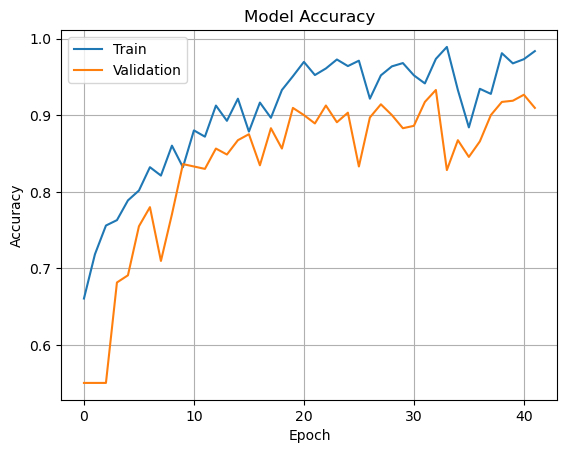

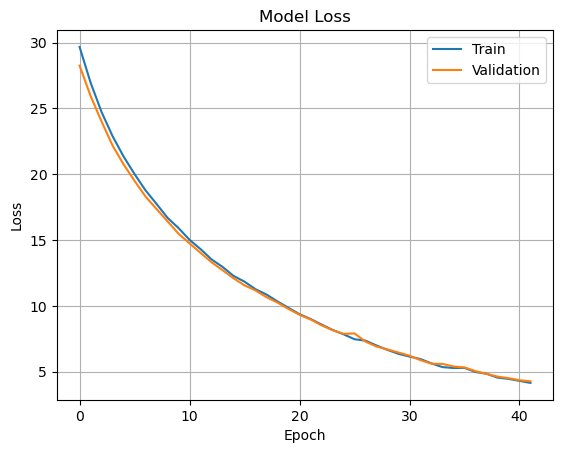

In [8]:
#vgg16 #93,
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

vgg16
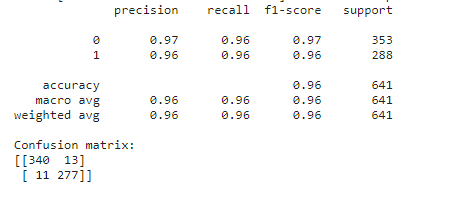

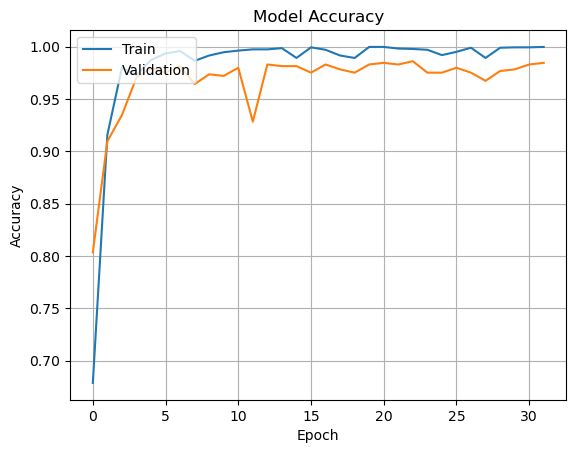

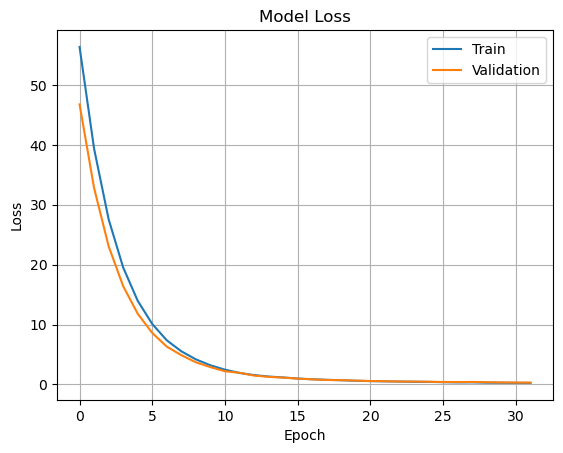

In [11]:

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()

#model.save('cnn_96_goodfit.h5')

on vgg16 result


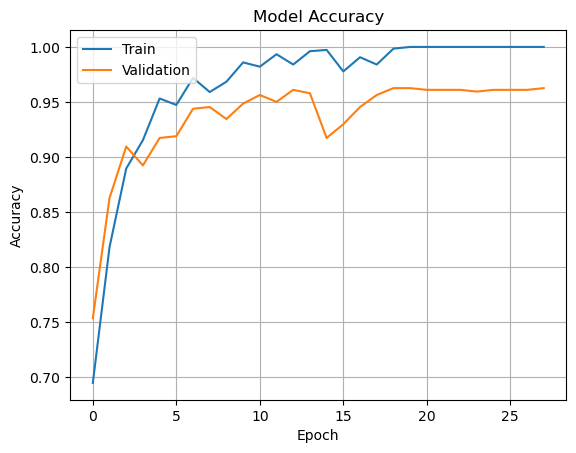

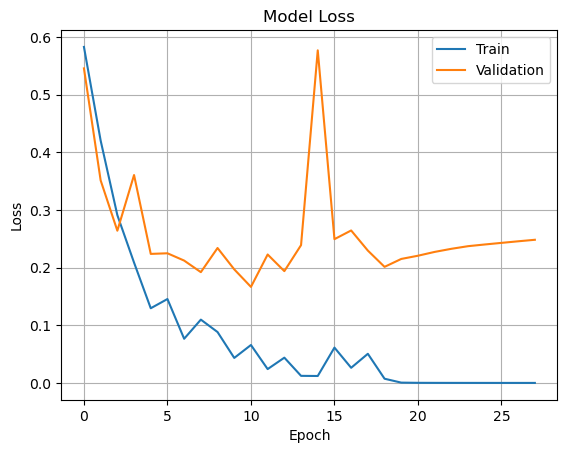

In [17]:
print('on vgg16 result')

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


on vgg16 norm result


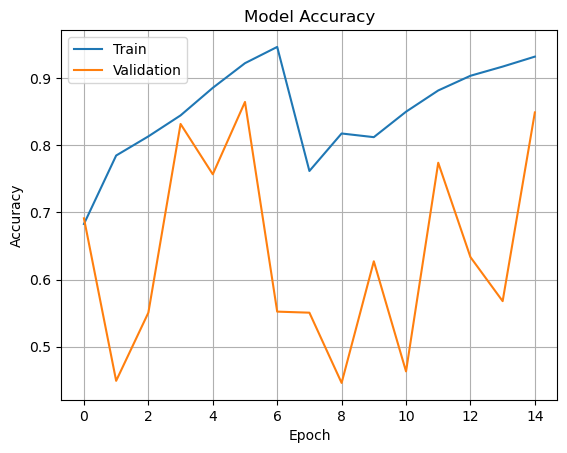

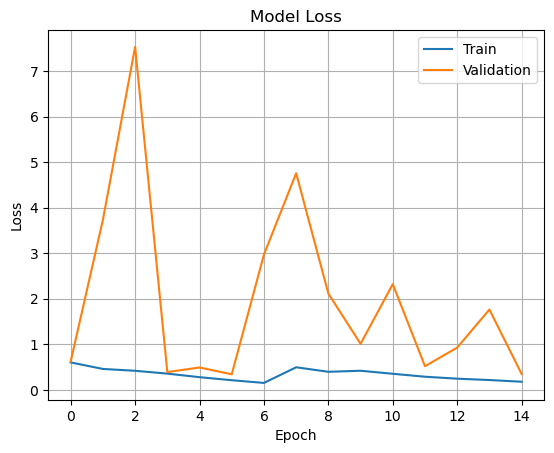

In [19]:
print('on vgg16 norm result')

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
# import gc
# #------------------------------------------------------------------------------
# #                          model create
# #------------------------------------------------------------------------------


# import tensorflow as tf

# # def create_cnn_model(input_shape=(224,224,3), num_classes=1, weights_path=None): #90 acc
# #     print("cnn_model created...")
# #     base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
# #     x = base_model.output
# #     x = tf.keras.layers.GlobalAveragePooling2D()(x)
# #     x = tf.keras.layers.Dense(128, activation='relu')(x)
# #     x = tf.keras.layers.Dense(64, activation='relu')(x)
# #     predictions = tf.keras.layers.Dense(num_classes, activation='sigmoid')(x)
# #     model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
    
# #     # load Imagenet weights if path is provided
# #     if weights_path is not None:
# #         model.load_weights(weights_path)
    
# #     return model


# from keras.initializers import glorot_uniform

# def create_cnn_model2(input_shape=(224,224,3), num_classes=1):
#     print("cnn_model modified created...")
#     model = Sequential()
#     model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, kernel_initializer=glorot_uniform()))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, (3,3), activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(256, (3,3), activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, (3,3), activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(1024, (3,3), activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     model.add(Dense(512, activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(Dropout(0.25))
#     model.add(Dense(64, activation='relu', kernel_initializer=glorot_uniform()))
#     model.add(Dropout(0.25))
#     model.add(Dense(1, activation='sigmoid', kernel_initializer=glorot_uniform()))
#     model.summary()
#     return model


# def create_cnn_model3(input_shape=(224,224,3), num_classes=1): #90 acc
#     print("cnn_model modified created...")
#     model = Sequential()
#     # feature extraction 
#     model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(256, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(1024, (3,3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     # classifier
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(64, activation='relu'))
#     model.add(Dropout(0.25))
#     model.add(Dense(1, activation='sigmoid'))
#     model.summary()
#     return model


# from keras.layers import BatchNormalization
# from keras.regularizers import l2

# def create_cnn_model2(input_shape=(224,224,3), num_classes=1): #90 acc
#     print("cnn_model_with_batch_normalization modified created...")
#     model = Sequential()
#     # feature extraction 
#     model.add(Conv2D(32, (3,3), input_shape=input_shape))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(64, (3,3)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(128, (3,3)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(256, (3,3)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(512, (3,3)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Conv2D(1024, (3,3)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Flatten())
#     # classifier
#     model.add(Dense(512, kernel_regularizer=l2(0.01)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(64, kernel_regularizer=l2(0.01)))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Dropout(0.4))
#     model.add(Dense(1, activation='sigmoid'))
#     #model.summary()
#     return model





# def create_cnn_model1(input_shape=(224,224,3), num_classes=1): #90 acc
#     print("cnn_model created...")
#     model = tf.keras.models.Sequential([
#         tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#         tf.keras.layers.MaxPooling2D((2, 2)),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(128, activation='relu'),
#         tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dense(num_classes, activation='sigmoid')
#     ])
#     return model



In [28]:
gc.collect()
#model.load_weights('weights-improvement-cnn-33-0.96.hdf5')
# Train all layers
# generate predicted labels for the test data
predicted_labels = model.predict(val_images)
predicted_labels = np.round(predicted_labels)

# generate the classification report
report = classification_report(val_labels, predicted_labels)

# print the report to the console
print(report)

# Compute the confusion matrix
cm = confusion_matrix(val_labels,predicted_labels)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

21/21 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       353
           1       0.94      0.88      0.91       288

    accuracy                           0.92       641
   macro avg       0.92      0.92      0.92       641
weighted avg       0.92      0.92      0.92       641

Confusion matrix:
[[338  15]
 [ 36 252]]


In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.save("vgg16_adam_lr=0.0001_96_.hdf5")
print('done')

In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.densenet import DenseNet121
import tensorflow as tf
import gc
from tensorflow.keras.optimizers import Adam

def create_densenet_model(input_shape=(224, 224, 3), num_classes=1, dropout_rate=0.5):
    # Load pre-trained DenseNet121 model
    base_model = DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=input_shape))

    # Add classification head
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    # Freeze layers in pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Create and compile model
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model



from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, DepthwiseConv2D, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model

def tinyNet():
    # Define the input tensor
    inputs = Input(shape=(224,224,3))

    # Initial convolution layer
    x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', strides=1)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Depthwise separable convolution layers
    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=32, kernel_size=(1, 1), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same', strides=2)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=64, kernel_size=(1, 1), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same', strides=2)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=128, kernel_size=(1, 1), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = DepthwiseConv2D(kernel_size=(3, 3), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters=128, kernel_size=(1, 1), padding='same', strides=1)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    # Global average pooling and final dense layer
    x = GlobalAveragePooling2D()(x)
    x = Dropout(rate=0.5)(x)
    outputs = Dense(units=1, activation='sigmoid')(x)

    # Define the model
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

print("hi")
#model=create_densenet_model()
model=tinyNet()
gc.collect()
#increase few more epochs


callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
history=model.fit(train_images, 
          train_labels,
          batch_size=32,
          epochs=100,
          validation_data=(val_images, val_labels),
          callbacks=[earlystopping,checkpoint,callback]) #88




Epoch 1/100
81/81 [==============================] - ETA: 0s - loss: 0.6672 - accuracy: 0.6218
Epoch 1: val_accuracy did not improve from 0.96568
81/81 [==============================] - 19s 126ms/step - loss: 0.6672 - accuracy: 0.6218 - val_loss: 0.6920 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 2/100
80/81 [============================>.] - ETA: 0s - loss: 0.6176 - accuracy: 0.6625
Epoch 2: val_accuracy did not improve from 0.96568
81/81 [==============================] - 9s 112ms/step - loss: 0.6176 - accuracy: 0.6624 - val_loss: 0.6886 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 3/100
80/81 [============================>.] - ETA: 0s - loss: 0.5728 - accuracy: 0.6875
Epoch 3: val_accuracy did not improve from 0.96568
81/81 [==============================] - 10s 120ms/step - loss: 0.5727 - accuracy: 0.6877 - val_loss: 0.6973 - val_accuracy: 0.5507 - lr: 0.0010
Epoch 4/100
80/81 [============================>.] - ETA: 0s - loss: 0.5645 - accuracy: 0.6953
Epoch 4: val_accuracy did not imp

In [27]:

# Train all layers
# generate predicted labels for the test data

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

predicted_labels = model.predict(val_images)
predicted_labels = np.round(predicted_labels)

# generate the classification report
report = classification_report(val_labels, predicted_labels)

# print the report to the console
print(report)

# Compute the confusion matrix
cm = confusion_matrix(val_labels,predicted_labels)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

21/21 [==============================] - 3s 58ms/step
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       353
           1       0.95      0.97      0.96       288

    accuracy                           0.96       641
   macro avg       0.96      0.96      0.96       641
weighted avg       0.96      0.96      0.96       641

Confusion matrix:
[[338  15]
 [ 10 278]]


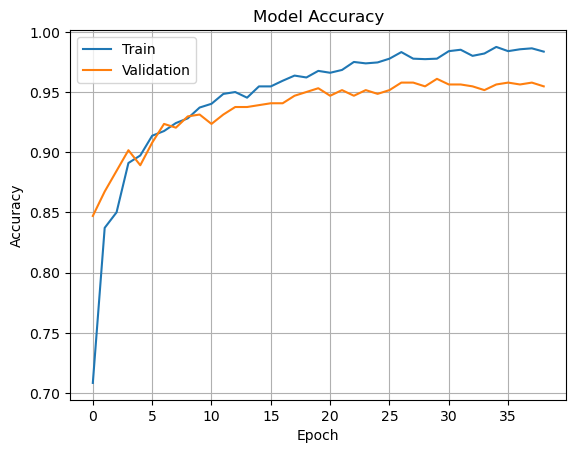

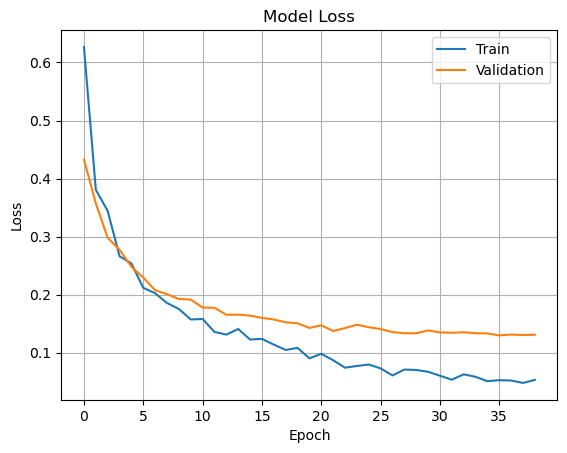

In [26]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()



In [18]:
import pickle

# Save the history object to a file
with open('history_densenet_97.pickle', 'wb') as file:
    pickle.dump(history.history, file)
print("done")

done


In [19]:
model.save("densenet_97.h5")

In [21]:
# Load the history object from a file
with open('history_densenet_97.pickle', 'rb') as file:
    history = pickle.load(file)
# densnet121

import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


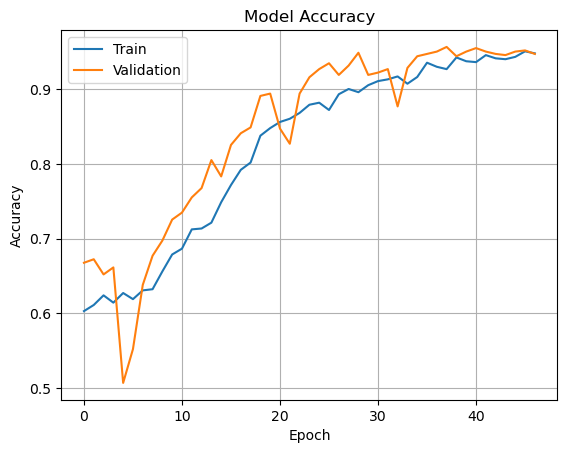

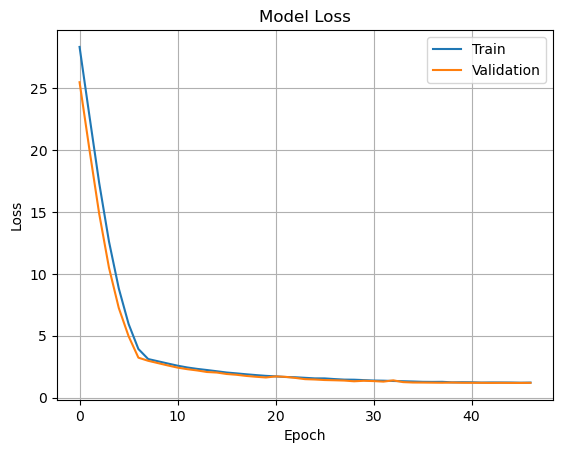

In [14]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()



# #cnn with batch size 4 result


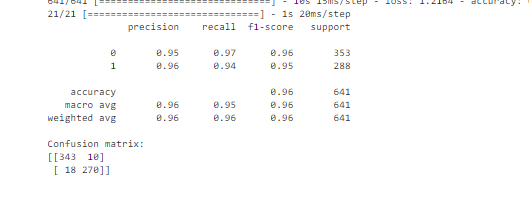, 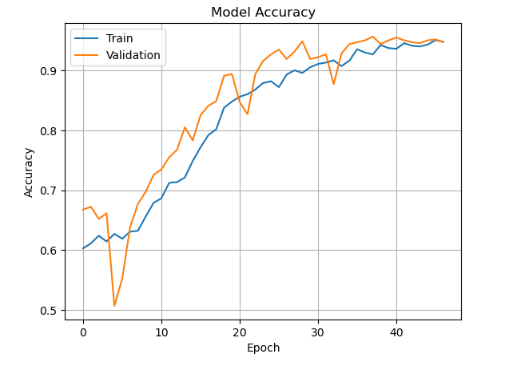, 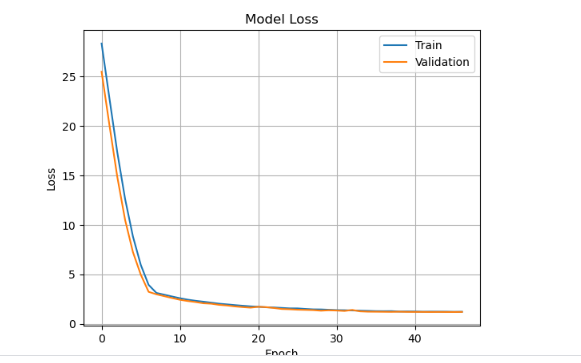

In [10]:
#the number of time steps, the number of rows and columns in the image, and the number of color channels.

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten

import gc
gc.collect()
time_steps=50
rows=224
columns=224
channels=3
# Define the input shape
input_shape = (rows,columns,channels)

# # Define the CNN model to extract features from the images
# cnn_model = Sequential()

# print("cnn_lstm_model modified created...")
# cnn_model = Sequential()
# cnn_model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Conv2D(64, (3,3), activation='relu'))
# cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
# cnn_model.add(Conv2D(128, (3,3), activation='relu'))


# # Reshape the output of the CNN model to match the expected input shape of the LSTM model
# cnn_output_shape = cnn_model.output_shape[1] * cnn_model.output_shape[2] * cnn_model.output_shape[3]
# reshape_layer = Reshape((128, -1))
# cnn_model.add(reshape_layer)

# # Define the LSTM model to learn temporal dependencies between the images
# lstm_model = Sequential()
# lstm_model.add(LSTM(64, return_sequences=True ))
# lstm_model.add(Dropout(0.2))
# lstm_model.add(LSTM(32))
# lstm_model.add(Dense(1, activation='sigmoid'))

# # Combine the CNN and LSTM models
# model = Sequential()
# model.add(cnn_model)
# model.add(lstm_model)
# model.summary()


from keras.callbacks import EarlyStopping
earlystopping =EarlyStopping(monitor='val_accuracy',patience=9,restore_best_weights=True);


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 512)      

In [26]:
import gc
gc.collect()


def cnn_lstm():
    cnn_model = Sequential()
    cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(rows, columns, channels)))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(128, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(256, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(512, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    cnn_model.add(Conv2D(1024, (3, 3), activation='relu'))
    cnn_model.add(MaxPooling2D((2, 2)))
    # Reshape the output of the CNN model to match the expected input shape of the LSTM model
    cnn_output_shape = cnn_model.output_shape[1] * cnn_model.output_shape[2] * cnn_model.output_shape[3]
    reshape_layer = Reshape((1024, -1))
    cnn_model.add(reshape_layer)

    # Define the LSTM model to learn temporal dependencies between the images
    lstm_model = Sequential()
    lstm_model.add(LSTM(64, return_sequences=True))
    lstm_model.add(Dropout(0.2))
    lstm_model.add(LSTM(32))
    lstm_model.add(Dense(1, activation='sigmoid'))

    # Combine the CNN and LSTM models
    model = Sequential()
    model.add(cnn_model)
    model.add(lstm_model)
    model.summary()
    return model


import tensorflow as tf

callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
opt=Adam(learning_rate=0.0001)

# Compile the model
model=cnn_lstm()



model.compile(
    optimizer=opt, 
    #loss='categorical_crossentropy', 
    loss='binary_crossentropy', 
    metrics=['accuracy'])


#cnn lstm
history=model.fit(train_images, train_labels, 
          batch_size=32, 
          epochs=50, 
          validation_data=(val_images, val_labels),
          callbacks=[callback,earlystopping,checkpoint])


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

# generate predicted labels for the test data
predicted_labels = model.predict(val_images)
predicted_labels = np.round(predicted_labels)

# generate the classification report
report = classification_report(val_labels, predicted_labels)

# print the report to the console
print(report)

# Compute the confusion matrix
cm = confusion_matrix(val_labels,predicted_labels)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_21 (Sequential)  (None, 1024, 1)           6288192   
                                                                 
 sequential_22 (Sequential)  (None, 1)                 30401     
                                                                 
Total params: 6,318,593
Trainable params: 6,318,593
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
81/81 [==============================] - ETA: 0s - loss: 0.6912 - accuracy: 0.5492
Epoch 1: val_accuracy did not improve from 0.94696
81/81 [==============================] - 16s 161ms/step - loss: 0.6912 - accuracy: 0.5492 - val_loss: 0.6877 - val_accuracy: 0.5507 - lr: 1.0000e-04
Epoch 2/50
81/81 [==============================] - ETA: 0s - loss: 0.6849 - accuracy: 0.5507
Epoch 2: val_accuracy did not improve from 0.94696


# CNN LSTM model apply

cnn-lstm
21/21 [==============================] - 1s 49ms/step
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       353
           1       0.89      0.71      0.79       288

    accuracy                           0.83       641
   macro avg       0.85      0.82      0.82       641
weighted avg       0.84      0.83      0.83       641

Confusion matrix:
[[329  24]
 [ 84 204]]


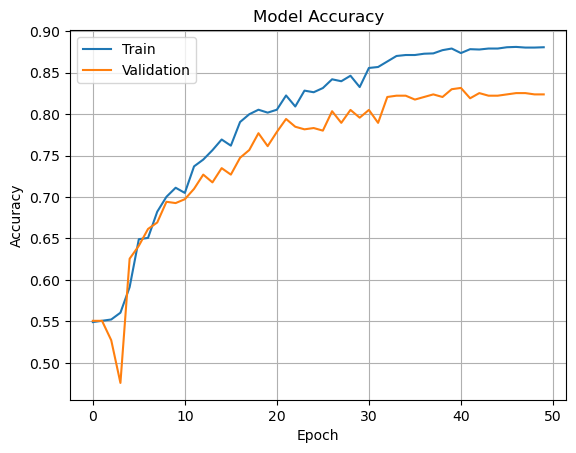

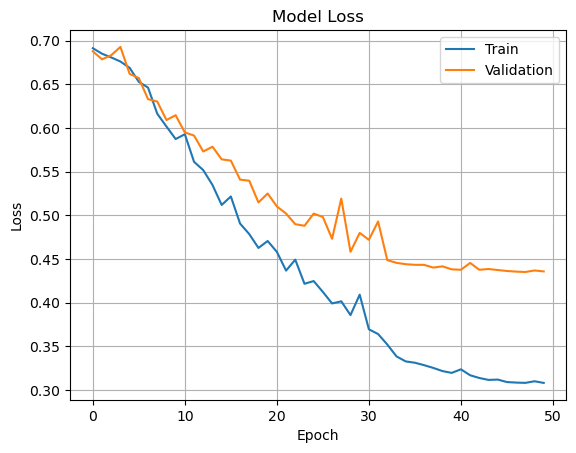

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import numpy as np

print("cnn-lstm")


# generate predicted labels for the test data
predicted_labels = model.predict(val_images)
predicted_labels = np.round(predicted_labels)

# generate the classification report
report = classification_report(val_labels, predicted_labels)

# print the report to the console
print(report)

# Compute the confusion matrix
cm = confusion_matrix(val_labels,predicted_labels)

# Print the confusion matrix
print('Confusion matrix:')
print(cm)

import matplotlib.pyplot as plt

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import os

directory = '/kaggle/working/'
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
    except Exception as e:
        print(f'Error deleting {file_path}: {e}')
print("done")